## Ejercicios de pair programming 4 enero: EDA III

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

# establecemos el tamaño nuestras figuras
plt.rcParams["figure.figsize"] = (10,8)

In [9]:
#abrimos el archivo
df= pd.read_csv("../datos/tiburon6.csv", index_col= 0)

2.1 Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [10]:
df.head()

,case_number,year,type,country,activity,injury,mes,deceso,genero,especies,edad
0,2018.06.25,2018,Boating,usa,Paddling,"No injury to occupant, outrigger canoe and pad...",Jun,N,F,White,57.0
1,2018.06.03.a,2018,Unprovoked,brazil,Swimming,FATAL,Jun,Y,M,Tiger,18.0
2,2018.05.26.b,2018,Unprovoked,usa,Walking,Lower left leg bitten,May,N,M,Bull,15.0
3,2018.05.24,2018,Provoked,australia,Feeding sharks,Minor bite to hand by captive shark. PROVOKED ...,May,N,M,Grey,32.0
4,2018.05.13.a,2018,Invalid,england,Fishing,Injured by teeth of a dead porbeagle shark he ...,May,N,M,Unspecified,21.0


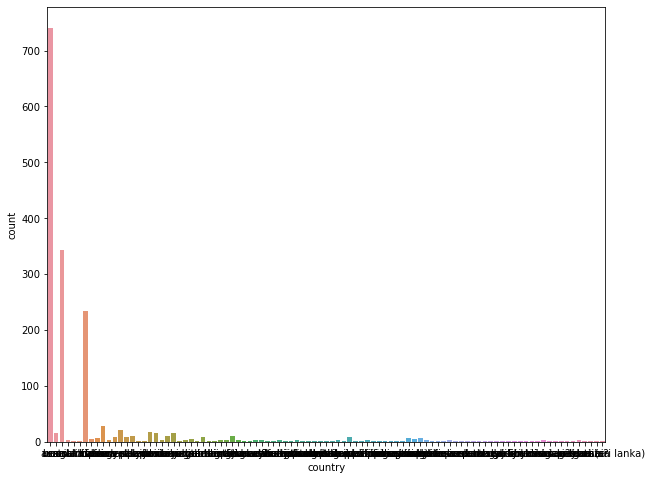

In [26]:
#intentamos una grafica con todos los paises del df
sns.countplot(x = "country", data = df)
plt.show();


Sale demasiado ruido en la grafica y no podemos distinguir nada asi que vamos a sacar los 10 paises con mas ataques

In [28]:
#sacamos los 10 paises con mas ataques
df.stb.freq(["country"], thresh= 90)[0:10]

,country,count,percent,cumulative_count,cumulative_percent
0,usa,741,44.584838,741,44.584838
1,australia,343,20.637786,1084,65.222623
2,south africa,234,14.079422,1318,79.302046
3,bahamas,29,1.744886,1347,81.046931
4,new zealand,21,1.263538,1368,82.310469
5,reunion,17,1.022864,1385,83.333333
6,papua new guinea,16,0.962696,1401,84.296029
7,brazil,16,0.962696,1417,85.258724
8,mexico,15,0.902527,1432,86.161252
9,italy,11,0.661853,1443,86.823105


In [17]:
paises_top = df.stb.freq(["country"], thresh= 90)[0:10]

In [19]:
lista_paises = paises_top["country"].unique()

In [20]:
lista_paises

array(['usa', 'australia', 'south africa', 'bahamas', 'new zealand',
       'reunion', 'papua new guinea', 'brazil', 'mexico', 'italy'],
      dtype=object)

In [21]:
#Creamos un df filtrando por los 10 paises con mas ataques de tiburon
df10 = df[df["country"].isin(lista_paises)]

In [27]:
df10.head()

,case_number,year,type,country,activity,injury,mes,deceso,genero,especies,edad
0,2018.06.25,2018,Boating,usa,Paddling,"No injury to occupant, outrigger canoe and pad...",Jun,N,F,White,57.0
1,2018.06.03.a,2018,Unprovoked,brazil,Swimming,FATAL,Jun,Y,M,Tiger,18.0
2,2018.05.26.b,2018,Unprovoked,usa,Walking,Lower left leg bitten,May,N,M,Bull,15.0
3,2018.05.24,2018,Provoked,australia,Feeding sharks,Minor bite to hand by captive shark. PROVOKED ...,May,N,M,Grey,32.0
6,2018.04.25.a,2018,Unprovoked,australia,Surfing,"No injury, knocked off board by shark",Apr,N,M,Unspecified,60.0


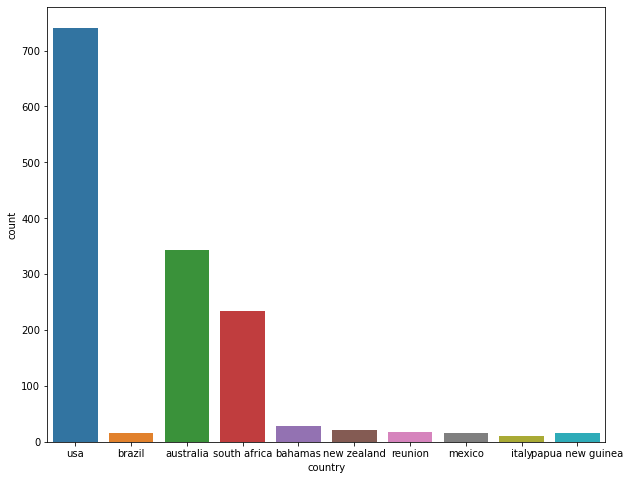

In [25]:
#Hacemos la grafica solo con esos paises
sns.countplot(x = "country", data = df10)

plt.show(); 

Ahora se ve mucho mejor, podemos afirmar que los paises con mas ataques son EEUU, Australia y Sudafrica con mucha diferencia con el resto

1.2. Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

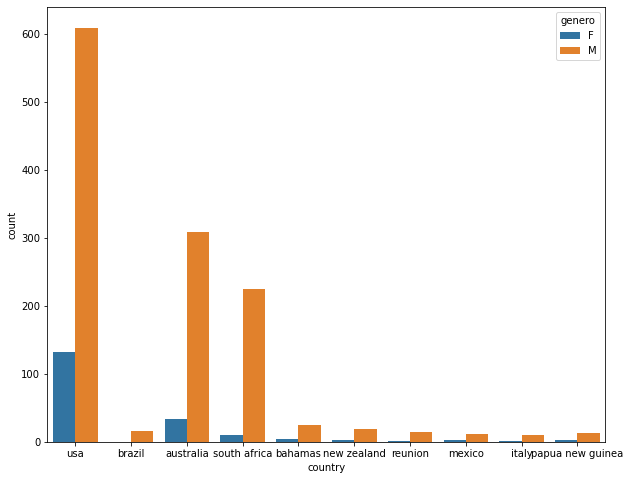

In [42]:
#Hacemos una grafica diferenciando por genero
sns.countplot(x = "country", data = df10, hue= 'genero');


Vemos que en todos los paises siempre hay mas ataques a hombres que en mujeres. Con mucha diferencia.

1.3. ¿Qué edad recibe mayor número de ataques? 
💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. 

Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [34]:
#Generamos una columna que llamaremos "rangos_edad" para que nos divida la columna edad en 4 grupos diferentes
df["rangos_edad"] = pd.cut(df["edad"], 4, labels = ["5-24", "25-44", "45-64", "+65"])

In [35]:
df.head(20)

,case_number,year,type,country,activity,injury,mes,deceso,genero,especies,edad,rangos_edad
0,2018.06.25,2018,Boating,usa,Paddling,"No injury to occupant, outrigger canoe and pad...",Jun,N,F,White,57.0,45-64
1,2018.06.03.a,2018,Unprovoked,brazil,Swimming,FATAL,Jun,Y,M,Tiger,18.0,5-24
2,2018.05.26.b,2018,Unprovoked,usa,Walking,Lower left leg bitten,May,N,M,Bull,15.0,5-24
3,2018.05.24,2018,Provoked,australia,Feeding sharks,Minor bite to hand by captive shark. PROVOKED ...,May,N,M,Grey,32.0,25-44
4,2018.05.13.a,2018,Invalid,england,Fishing,Injured by teeth of a dead porbeagle shark he ...,May,N,M,Unspecified,21.0,5-24
5,2018.04.28.b,2018,Unprovoked,costa rica,Scuba diving,"No injury, shark bit scuba gear",Apr,N,M,Tiger,30.0,25-44
6,2018.04.25.a,2018,Unprovoked,australia,Surfing,"No injury, knocked off board by shark",Apr,N,M,Unspecified,60.0,45-64
7,2018.04.23,2018,Unprovoked,maldives,Fishing,5-inch cut to hand,Apr,N,M,Tiger,32.0,25-44
8,2018.04.22,2018,Unprovoked,south africa,Paddle-skiing,"No injury, shark bit hole in ski",Apr,N,M,White,33.0,25-44
9,2018.04.03,2018,Unprovoked,south africa,Surfing,Lacerations to left knee & lower leg,Apr,N,M,White,19.0,5-24


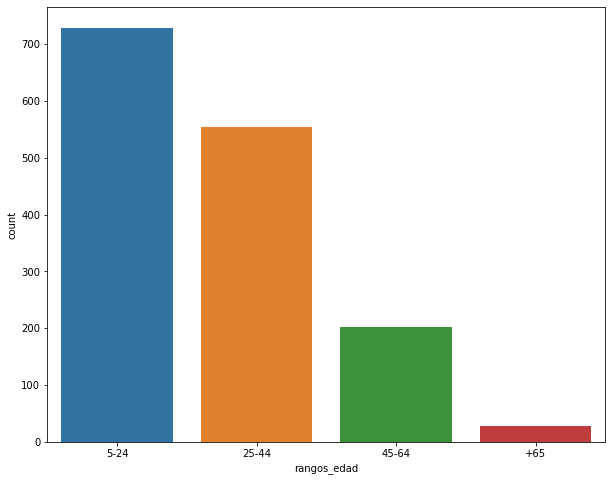

In [43]:
#Generamos una grafica para visualizar las diferentes frecuencias por edad
sns.countplot(x = "rangos_edad", data = df);



Vemos que la franja de edad que mas ataques sufre es entre los 5 y los 24 años. Seguido de los 25-44 años. A partir de los 45 los ataques se reducen

2.4. Ataques entre sexos, ¿hay diferencia?

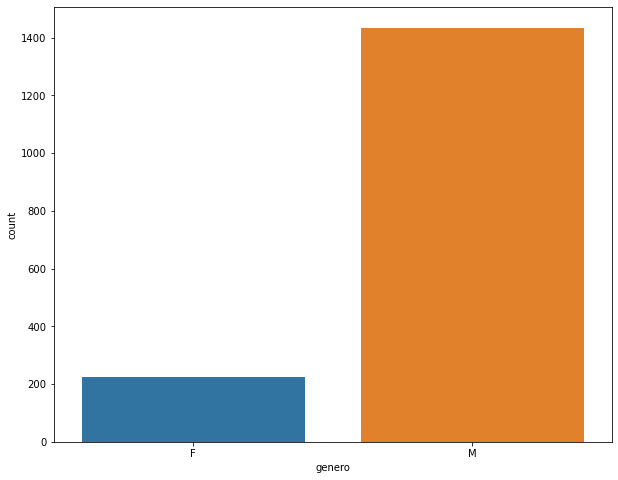

In [40]:
#Generamos una grafica para visualizar la diferencia entre sexos
sns.countplot(x = "genero", data = df);


Claramente sufren mas ataques de tiburon los hombres, con mucha diferencia

2.5. ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

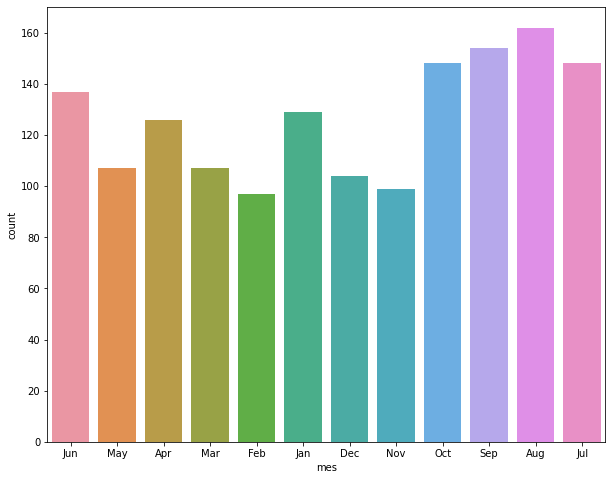

In [41]:
#Generamos la grafica
sns.countplot(x = "mes", data = df);


Podemos ver que entre junio y octubre se sufren la mayoria de los ataques. Coincidiria con la temporada de vacaciones de mas gente